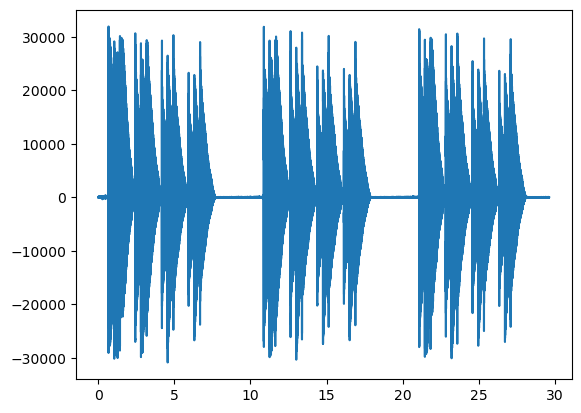

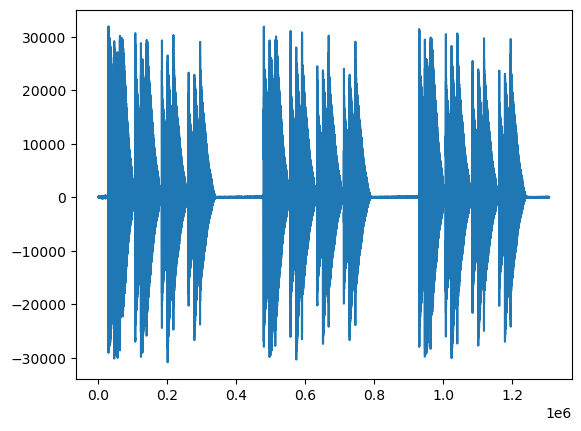

In [1]:
# 音をプロットして波形を表示
import wave
import numpy as np
import matplotlib.pyplot as plt
 
file_name = "intercomSound.wav" # 録音ファイル
RATE = 44100 # 録音時に設定したRATE

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

x = np.arange(data.shape[0]) / RATE
plt.plot(x, data)
plt.show() # 横軸:時間(sec)
x = [i for i in range(len(data))]
plt.plot(x, data)
plt.show() # 横軸:データ点インデックス


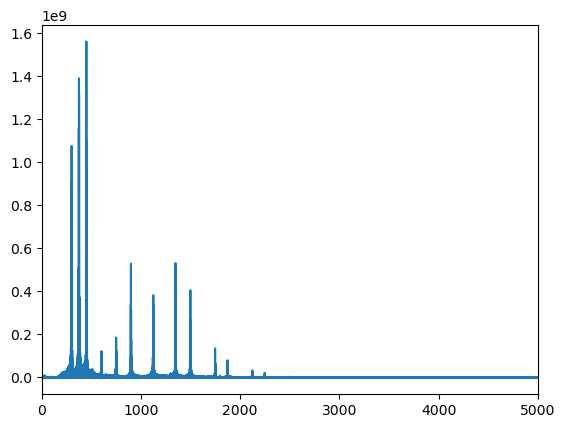

In [3]:
# 全体をFFTしたときのスペクトルを表示
import wave
import numpy as np
import matplotlib.pyplot as plt
 
file_name = "intercomSound.wav" # 録音ファイル
RATE = 44100 # 録音時に設定したRATE

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

fft_data = np.abs(np.fft.fft(data))    #FFTした信号の強度
freqList = np.fft.fftfreq(data.shape[0], d=1.0/RATE)    #周波数（グラフの横軸）の取得
plt.plot(freqList, fft_data)
plt.xlim(0, 5000)    #0～5000Hzまでとりあえず表示する
plt.show()


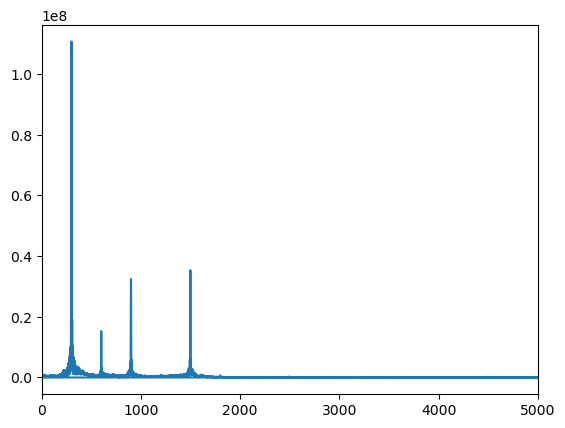

In [4]:
# 1秒間のデータだけFFTしてスペクトルを表示
import wave
import numpy as np
import matplotlib.pyplot as plt
 
file_name = "intercomSound.wav" # 録音ファイル
RATE = 44100 # 録音時に設定したRATE
CHUNK = 1024 * 8 # 録音時に設定したCHUNK
RECORD_SECONDS = 1 # 検出に使いたい秒数
pnts = int(RATE / CHUNK * RECORD_SECONDS) * CHUNK # dataが何点になるかを計算

start = 0 # ここをいろいろ変えてみる

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

data = data[start:start+pnts]
fft_data = np.abs(np.fft.fft(data))    #FFTした信号の強度
freqList = np.fft.fftfreq(data.shape[0], d=1.0/RATE)    #周波数（グラフの横軸）の取得
plt.plot(freqList, fft_data)
plt.xlim(0, 5000)    #0～5000Hzまでとりあえず表示する
plt.show()
